In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Deep AE

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
latent_output = Dense(32, activation='relu')(encoded)

latent_input = Input(shape=(32,))
decoded = Dense(64, activation='relu')(latent_input)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [4]:
# this model maps an input to its encoded representation
encoder = Model(input_img, latent_output, name='encoder')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [5]:
decoder = Model(latent_input, decoded, name='decoder')
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder = Model(input_img, decoder(encoder(input_img)), name='autoencoder')
autoencoder.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
encoder (Model)              (None, 32)                110816    
_________________________________________________________________
decoder (Model)              (None, 784)               111568    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 8s - loss: 0.2519 - val_loss: 0.1742
Epoch 2/100
 - 6s - loss: 0.1550 - val_loss: 0.1387
Epoch 3/100
 - 7s - loss: 0.1331 - val_loss: 0.1261
Epoch 4/100
 - 7s - loss: 0.1237 - val_loss: 0.1187
Epoch 5/100
 - 8s - loss: 0.1178 - val_loss: 0.1141
Epoch 6/100
 - 8s - loss: 0.1138 - val_loss: 0.1108
Epoch 7/100
 - 8s - loss: 0.1105 - val_loss: 0.1082
Epoch 8/100
 - 7s - loss: 0.1077 - val_loss: 0.1051
Epoch 9/100
 - 7s - loss: 0.1052 - val_loss: 0.1028
Epoch 10/100
 - 7s - loss: 0.1033 - val_loss: 0.1021
Epoch 11/100
 - 7s - loss: 0.1018 - val_loss: 0.1001
Epoch 12/100
 - 7s - loss: 0.1004 - val_loss: 0.0987
Epoch 13/100
 - 7s - loss: 0.0992 - val_loss: 0.0973
Epoch 14/100
 - 7s - loss: 0.0980 - val_loss: 0.0966
Epoch 15/100
 - 7s - loss: 0.0970 - val_loss: 0.0959
Epoch 16/100
 - 7s - loss: 0.0959 - val_loss: 0.0949
Epoch 17/100
 - 6s - loss: 0.0951 - val_loss: 0.0939
Epoch 18/100
 - 6s - loss: 0.0944 - val_loss: 0.0934
Epoch

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

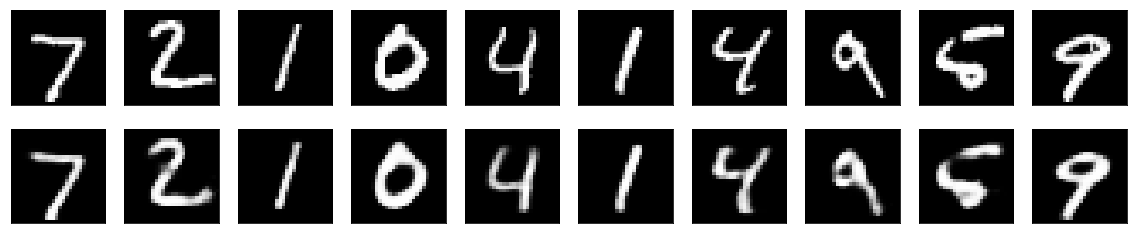

In [12]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

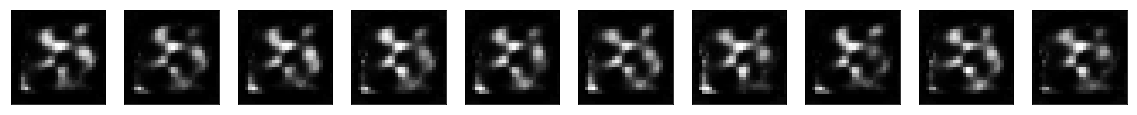

In [13]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoder.predict(np.random.random(32).reshape(1, -1)).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

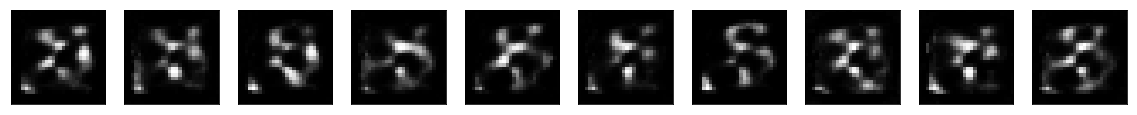

In [14]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoder.predict(np.random.random(32).reshape(1, -1) * 2).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Conv AE

In [15]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

In [16]:
# this is our input placeholder
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

latent_input = Input(shape=(4, 4, 8))
x = Conv2D(8, (3, 3), activation='relu', padding='same')(latent_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [17]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded, name='encoder')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
Total para

In [18]:
decoder = Model(latent_input, decoded, name='decoder')
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 16)        0         
__________

In [19]:
autoencoder = Model(input_img, decoder(encoder(input_img)), name='autoencoder')
autoencoder.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 4, 4, 8)           1904      
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         2481      
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [20]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [22]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [24]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 197s 3ms/step - loss: 0.1487 - val_loss: 0.1309
Epoch 2/50
60000/60000 [==============================] - 196s 3ms/step - loss: 0.1252 - val_loss: 0.1191
Epoch 3/50
60000/60000 [==============================] - 210s 3ms/step - loss: 0.1170 - val_loss: 0.1133
Epoch 4/50
60000/60000 [==============================] - 201s 3ms/step - loss: 0.1124 - val_loss: 0.1099
Epoch 5/50
60000/60000 [==============================] - 209s 3ms/step - loss: 0.1094 - val_loss: 0.1078
Epoch 6/50
60000/60000 [==============================] - 213s 4ms/step - loss: 0.1069 - val_loss: 0.1047
Epoch 7/50
60000/60000 [==============================] - 210s 4ms/step - loss: 0.1051 - val_loss: 0.1031
Epoch 8/50
60000/60000 [==============================] - 211s 4ms/step - loss: 0.1036 - val_loss: 0.1018
Epoch 9/50
57984/60000 [===========================>..] - ETA: 6s - loss: 0.1024

KeyboardInterrupt: 

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoder.predict(np.random.random(128).reshape(-1, 4, 4, 8)).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoder.predict(np.random.random(32).reshape(-1, 4, 4, 8) * 2).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()